# Credit Card Fraud Detection

- By **Anmol Kumar Parida**

## Problem Statement
The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, it needs to be handled before model building.

## Business Problem Overview
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by the Nilson report that by 2020 the banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways.

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

# Content Guide

- Importing Libararies

- Data Understanding

- Explaratory Data Analysis

- Train_Test_Split
    - Checking for Skewness in the Data

- Model Building (Imbalanced Class)
    - Functions used during Modelling
    - Logistic Regression (Imbalanced Class)
    - Decision Tree (Imbalanced Class)
    - SVM (Imbalanced Class)
    - KNN (Imbalanced Class)
    - XGBoost (Imbalanced Class)
    - Random Forest (Imbalanced Class)
    - Comparing Metrices (Imbalanced Class)
    - Final Model on the Imbalanced Data

- Model Building (SMOTE)
    - Class Distribution after applying SMOTE
    - Decision Tree (SMOTE)
    - SVM (SMOTE)
    - KNN (SMOTE)
    - XGBoost (SMOTE)

- Model building (ADASYN)
    - Class Distribution after applying ADASYN
    - Decision Tree (ADASYN)
    - SVM (ADASYN)
    - KNN (ADASYN)
    - XGBoost (ADASYN)

- Final Model Based On Oversampling Method
    - Comparing Metrices (Model + Over-Sampling)
    - Final Model (XGBoost + over sampling with SMOTE)
    - Metrices for the Final Model
      - Train Scores
      - Test Scores

  - Important features of the Final Model


# Importing Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from typing import List

import os
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from IPython.display import display
pd.options.display.max_columns = None

# hide warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn import metrics
from sklearn import preprocessing
from scipy import stats

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Data Understanding

**`Caution`**: `If using Google Colab use the following 2 steps, else skip and use regular import`

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Credit_Card_Fraud_Detection/creditcard.csv')
# df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**`Checking the percentage of Missing Value`**


In [ ]:
((df.isna().sum(axis=0)*100)/df.shape[0]).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

# Explaratory Data Analysis

In [ ]:
# Percentage Share of the Fraud and Normal Transactions
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('normal_share : '+  str(normal_share))
print('fraud_share  : '+  str(fraud_share))

normal_share : 99.82725143693798
fraud_share  : 0.1727485630620034


In [ ]:
classes.head()

0    284315
1       492
Name: Class, dtype: int64

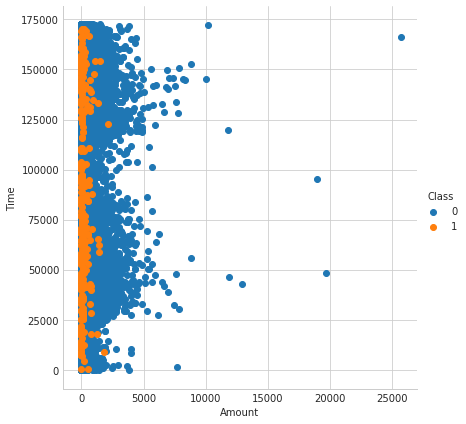

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

Text(0.5, 1.0, 'Transaction class distribution')

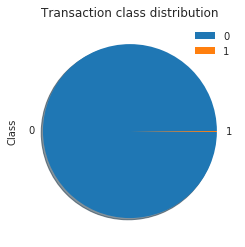

In [ ]:
# Class wise(Normal & Fraud) distribution of data
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'pie', shadow=True, legend=True)
plt.title("Transaction class distribution")

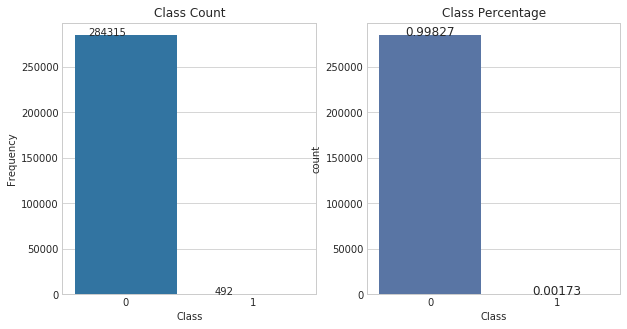

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize = (10, 5))

# Plot for Count
plt.subplot(1,2,1)
ax = sns.countplot( x ="Class", data=df)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

# Plot for Percentage
plt.subplot(1,2,2)
from matplotlib.pyplot import show
import seaborn as sns
plt.title("Class Percentage")
plt.xlabel("Class")
plt.ylabel("Frequency")
sns.set(style="darkgrid")

ax = sns.countplot( x ="Class", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.5f}'.format(height/len(df)), ha="center") 


In [ ]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

Text(0, 0.5, 'Frequency')

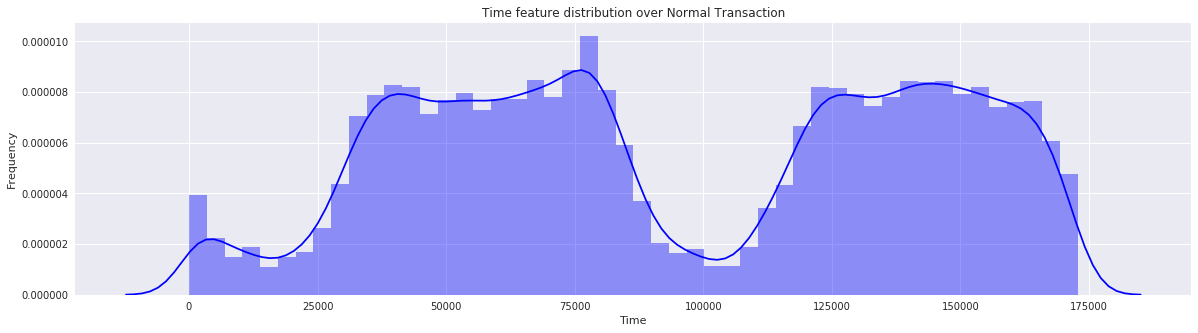

In [ ]:
# Create a scatter plot to observe the distribution of classes with time

plt.figure(figsize = (20, 5))

sns.distplot(df.Time, color='b')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

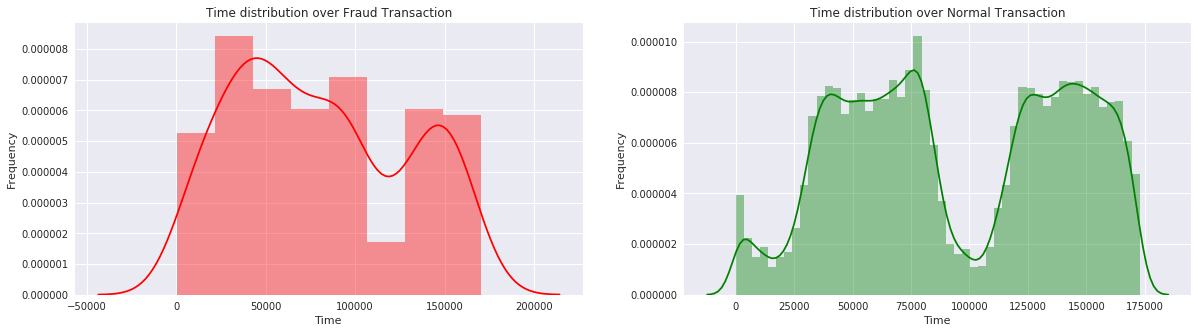

In [ ]:
plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.distplot(fraud.Time, color='r')
plt.title("Time distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(normal.Time, color='g')
plt.title("Time distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

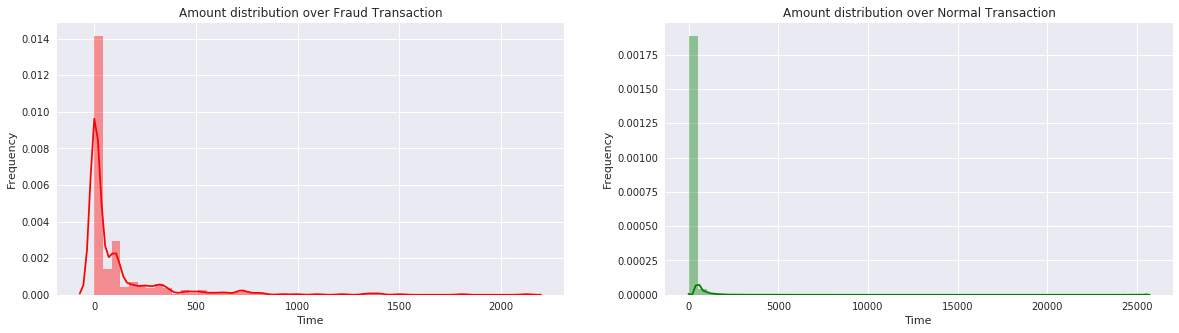

In [ ]:
plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.distplot(fraud.Amount, color='r')
plt.title("Amount distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(normal.Amount, color='g')
plt.title("Amount distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")


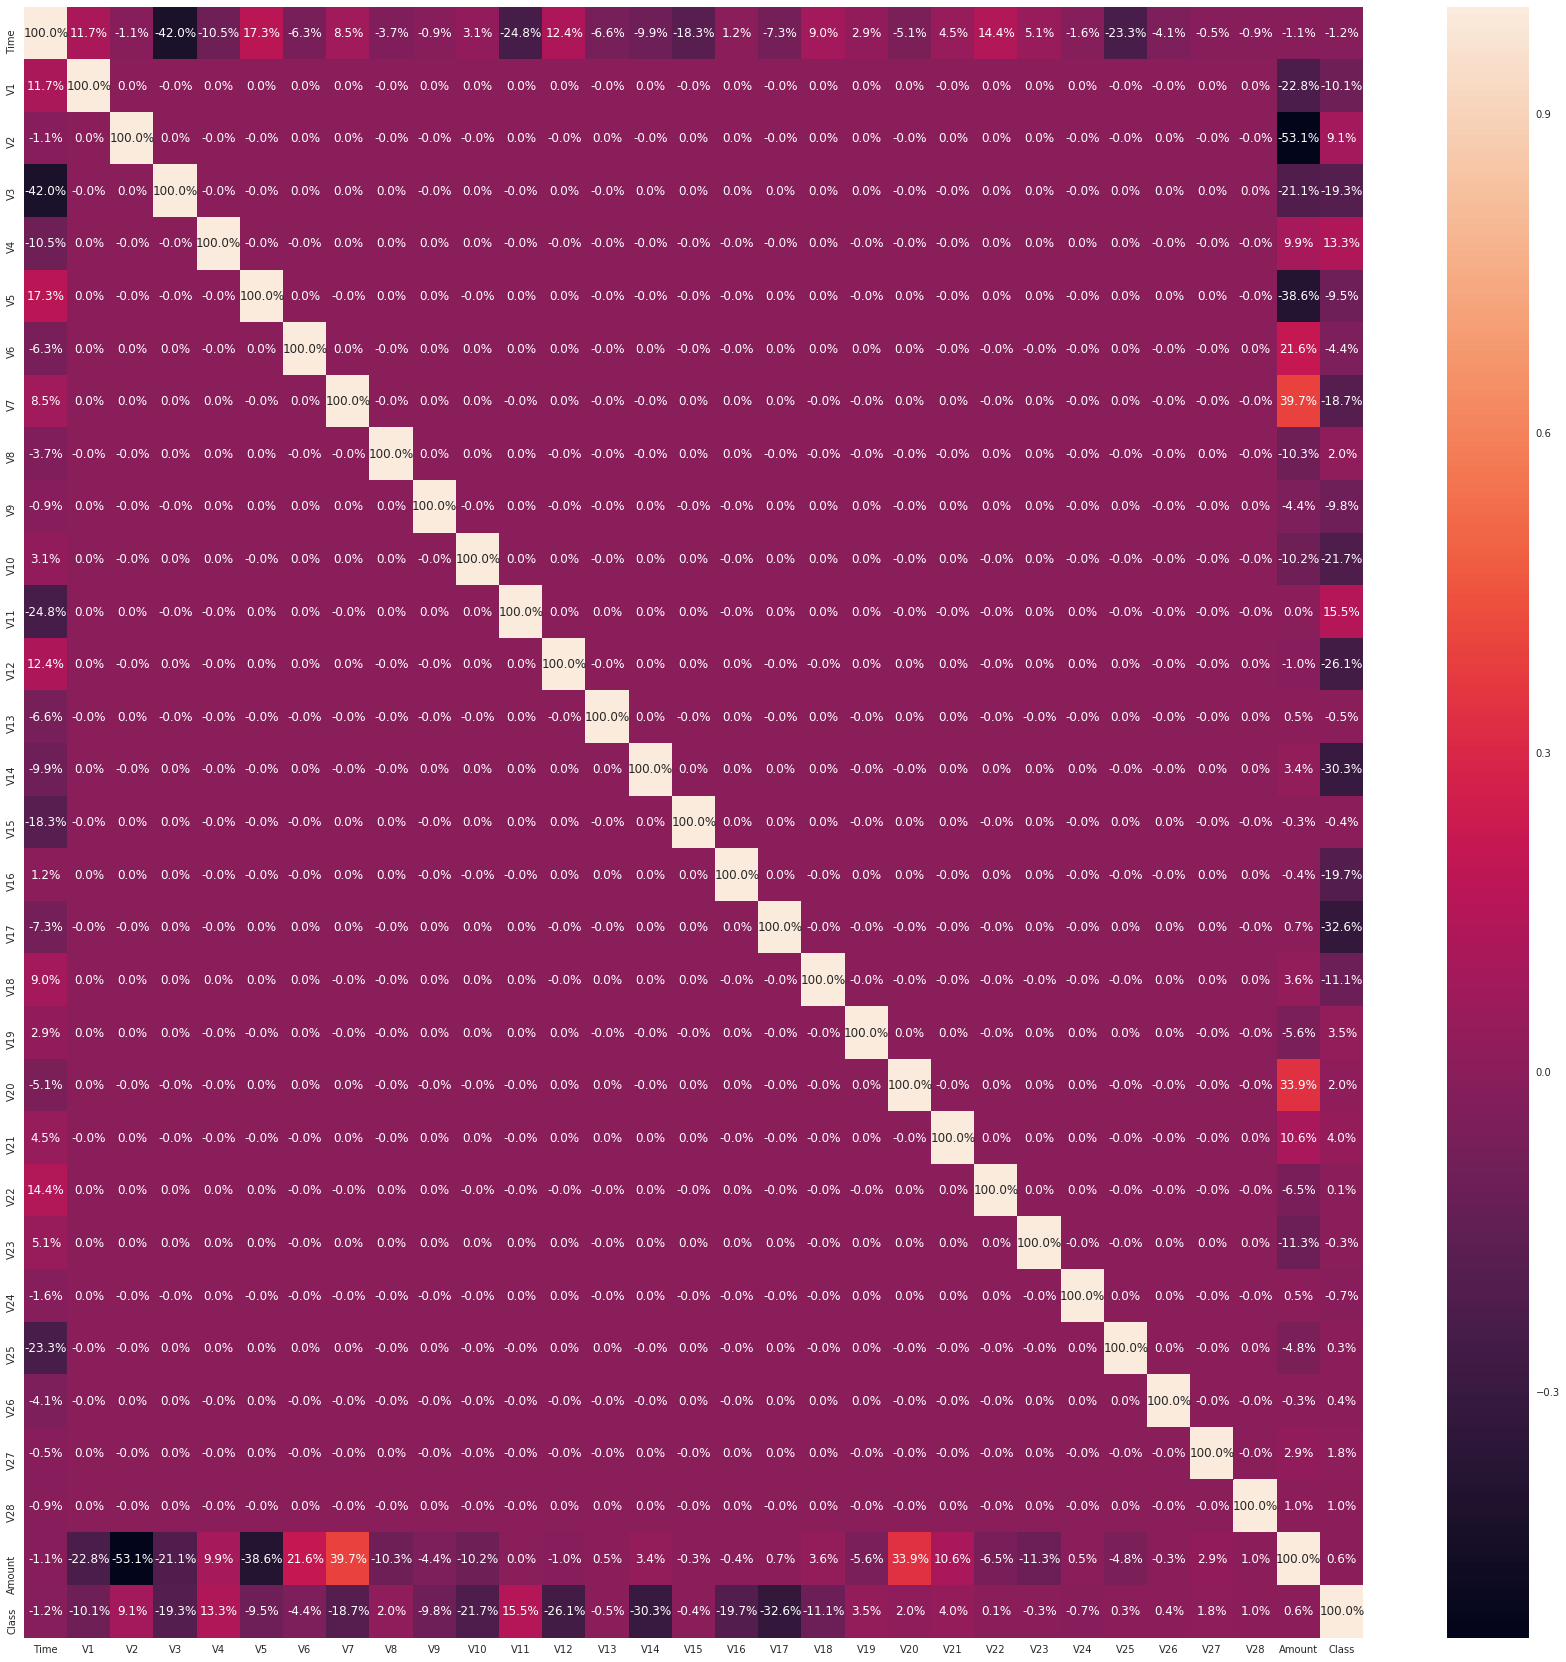

In [ ]:
# Correlation matrix 
plt.figure(figsize = (30,30))  
sns.heatmap(df.corr(),annot = True, fmt=".1%")
plt.show()

# Train_Test_Split

In [7]:
#As discussed  Time is just offset transaction value and not the time of transaction
X = df.drop(['Time','Class'],axis = 1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


**From above its clear that except `Amount` everything is normalised, We will normalize amount and perform Split**

In [8]:
scaler = StandardScaler()

X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [9]:
y = df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [10]:
model_train = df.drop("Class", 1).values
model_test = df["Class"].values

In [11]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


In [ ]:
print("Number transactions Train Dataset : ", len(X_train))
print("Number transactions Test dataset  : ", len(X_test))
print("Total number of Transactions      : ", len(X_train)+len(X_test))

Number transactions Train Dataset :  199364
Number transactions Test dataset  :  85443
Total number of Transactions      :  284807


### Checking for Skewness in the Data

- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

- The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.
- Negative values for the skewness indicate data that are skewed left. 
- Positive values for the skewness indicate data that are skewed right.
<br><br>
- `From the Distribution plot of 28 variables we noticed some are highly skewed while some are left/right skewed.`

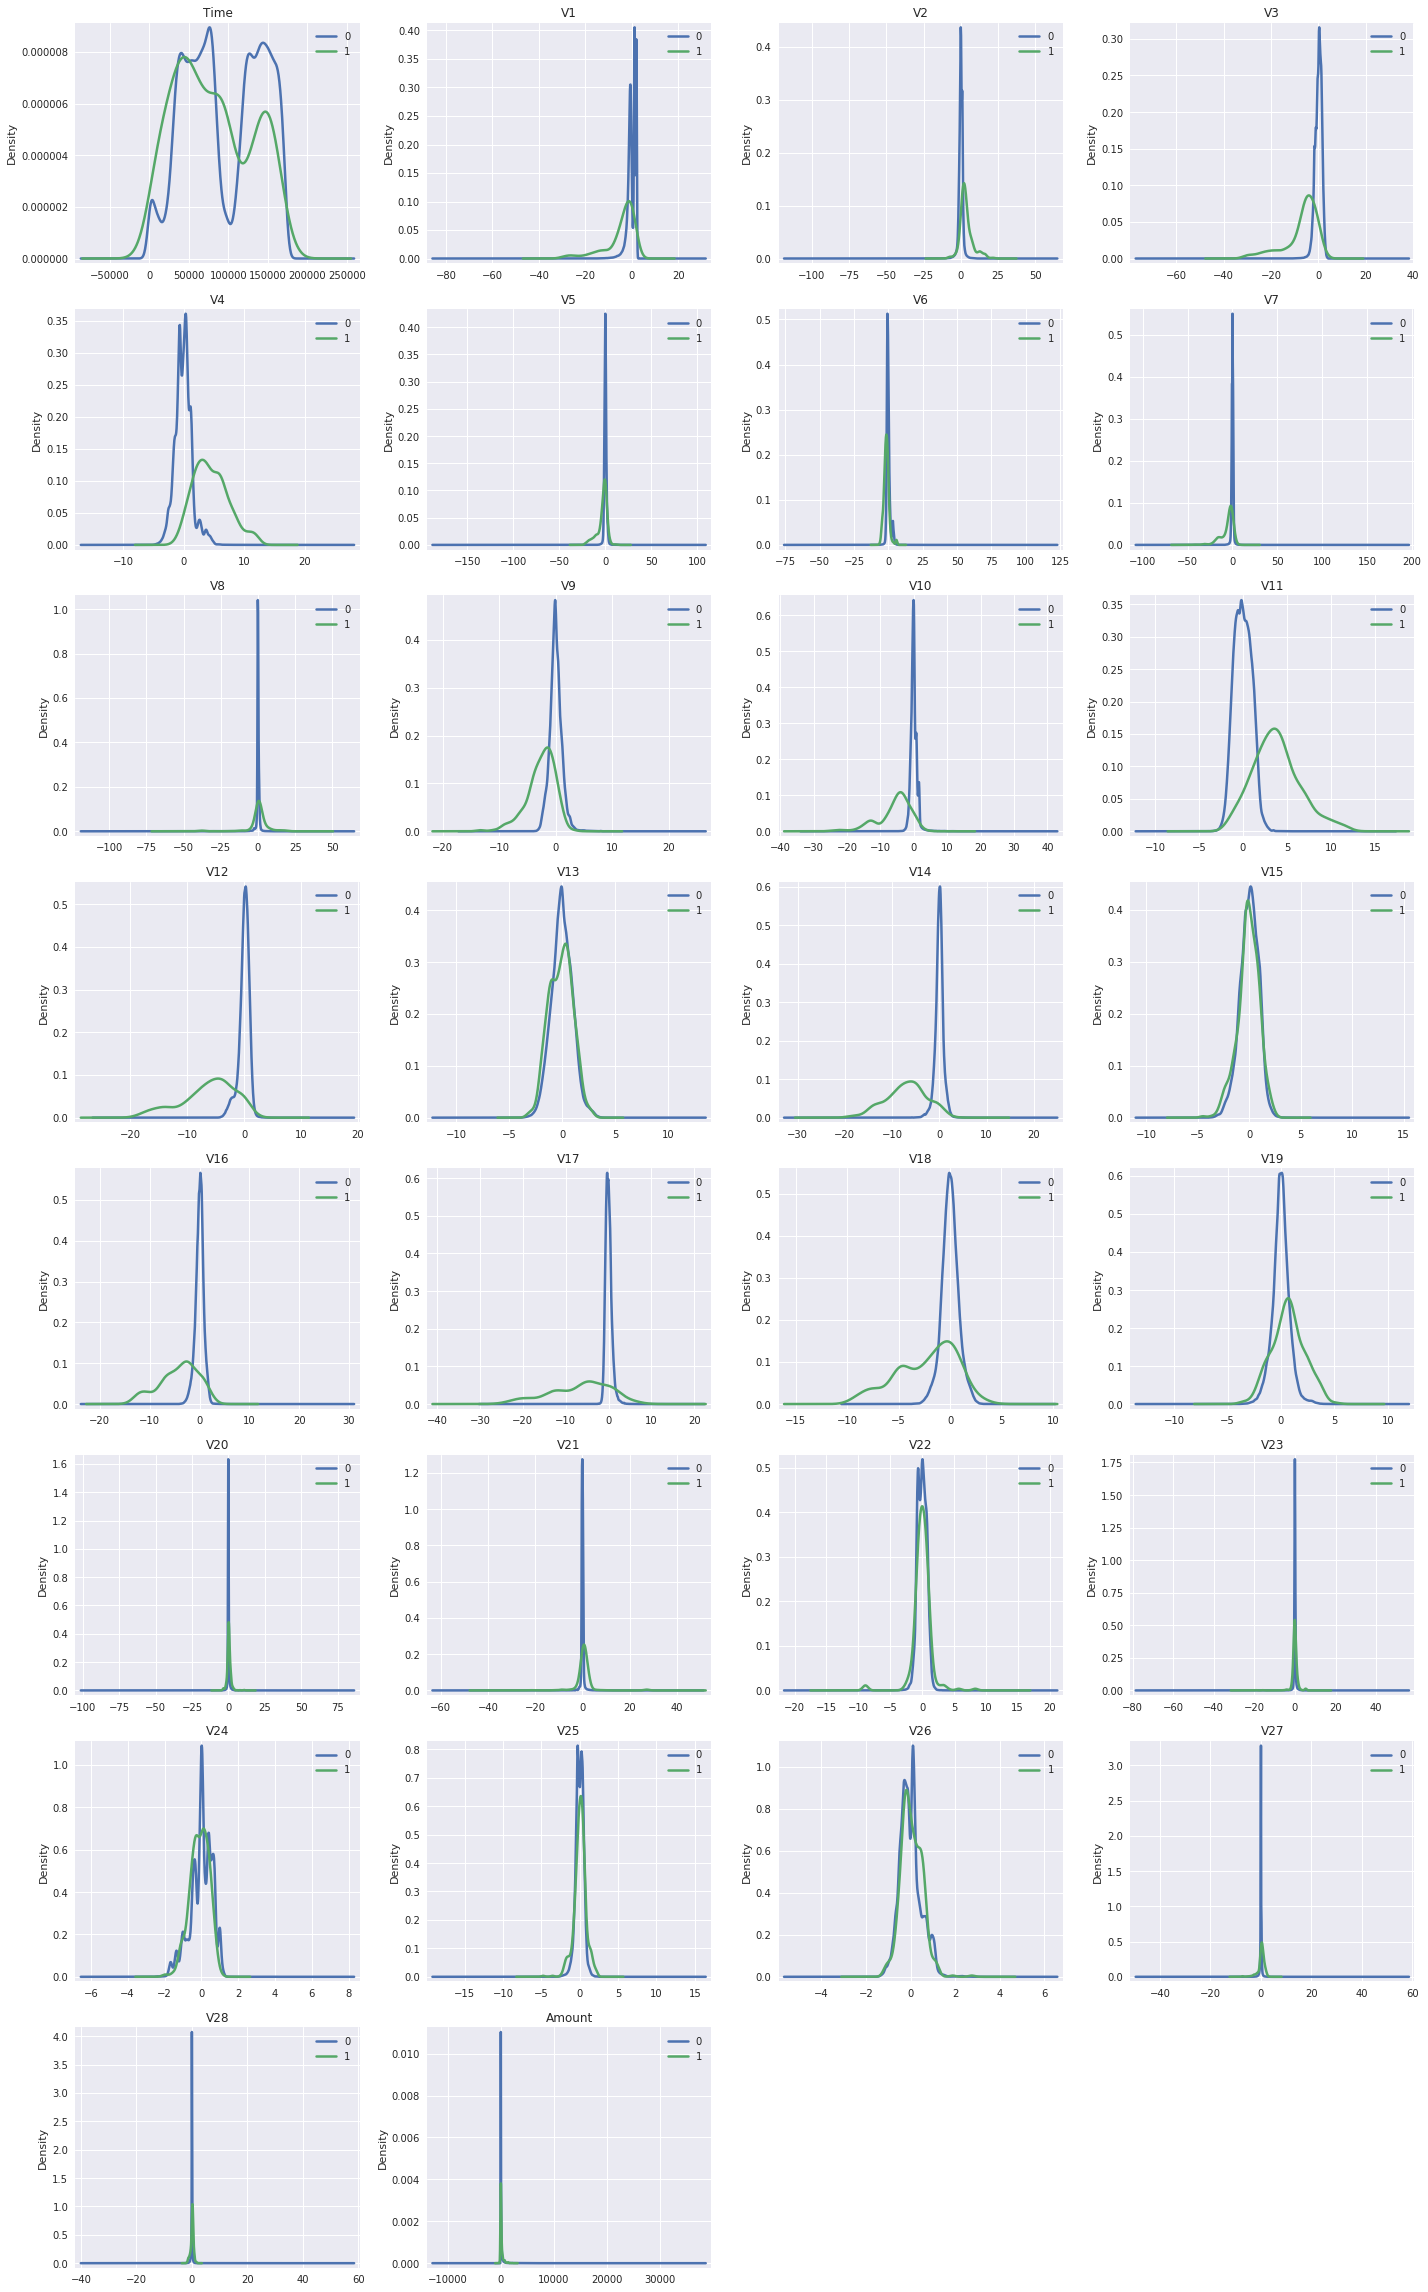

In [ ]:
plt.figure(figsize=(20,32))
for plot, feat in enumerate(df.columns[:-1]):
    plt.subplot(8, 4, (plot+1))
    title = str(feat)
    
    # Normalise to visualise the differences in distributions
    temp_df = pd.concat([df[feat], df['Class']], axis='columns')
    temp_df.groupby(by='Class')[feat].plot(kind='kde', alpha=1, legend='best', lw=2.5)
    plt.title(title)
    plt.tight_layout(); plt.margins(0.02)
    
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [13]:
v_cols = ['V1','V2','V3','V4','V5','V6','V7','V8','V11','V12','V14','V15','V17','V18','V20','V21','V23','V24','V27','V28']

In [14]:
# Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

# PowerTransformer requires a matrix/DataFrame

X_train[v_cols] = pt.fit_transform(X_train[v_cols].values)
X_test[v_cols] = pt.transform(X_test[v_cols].values)

In [ ]:
len(v_cols)

20

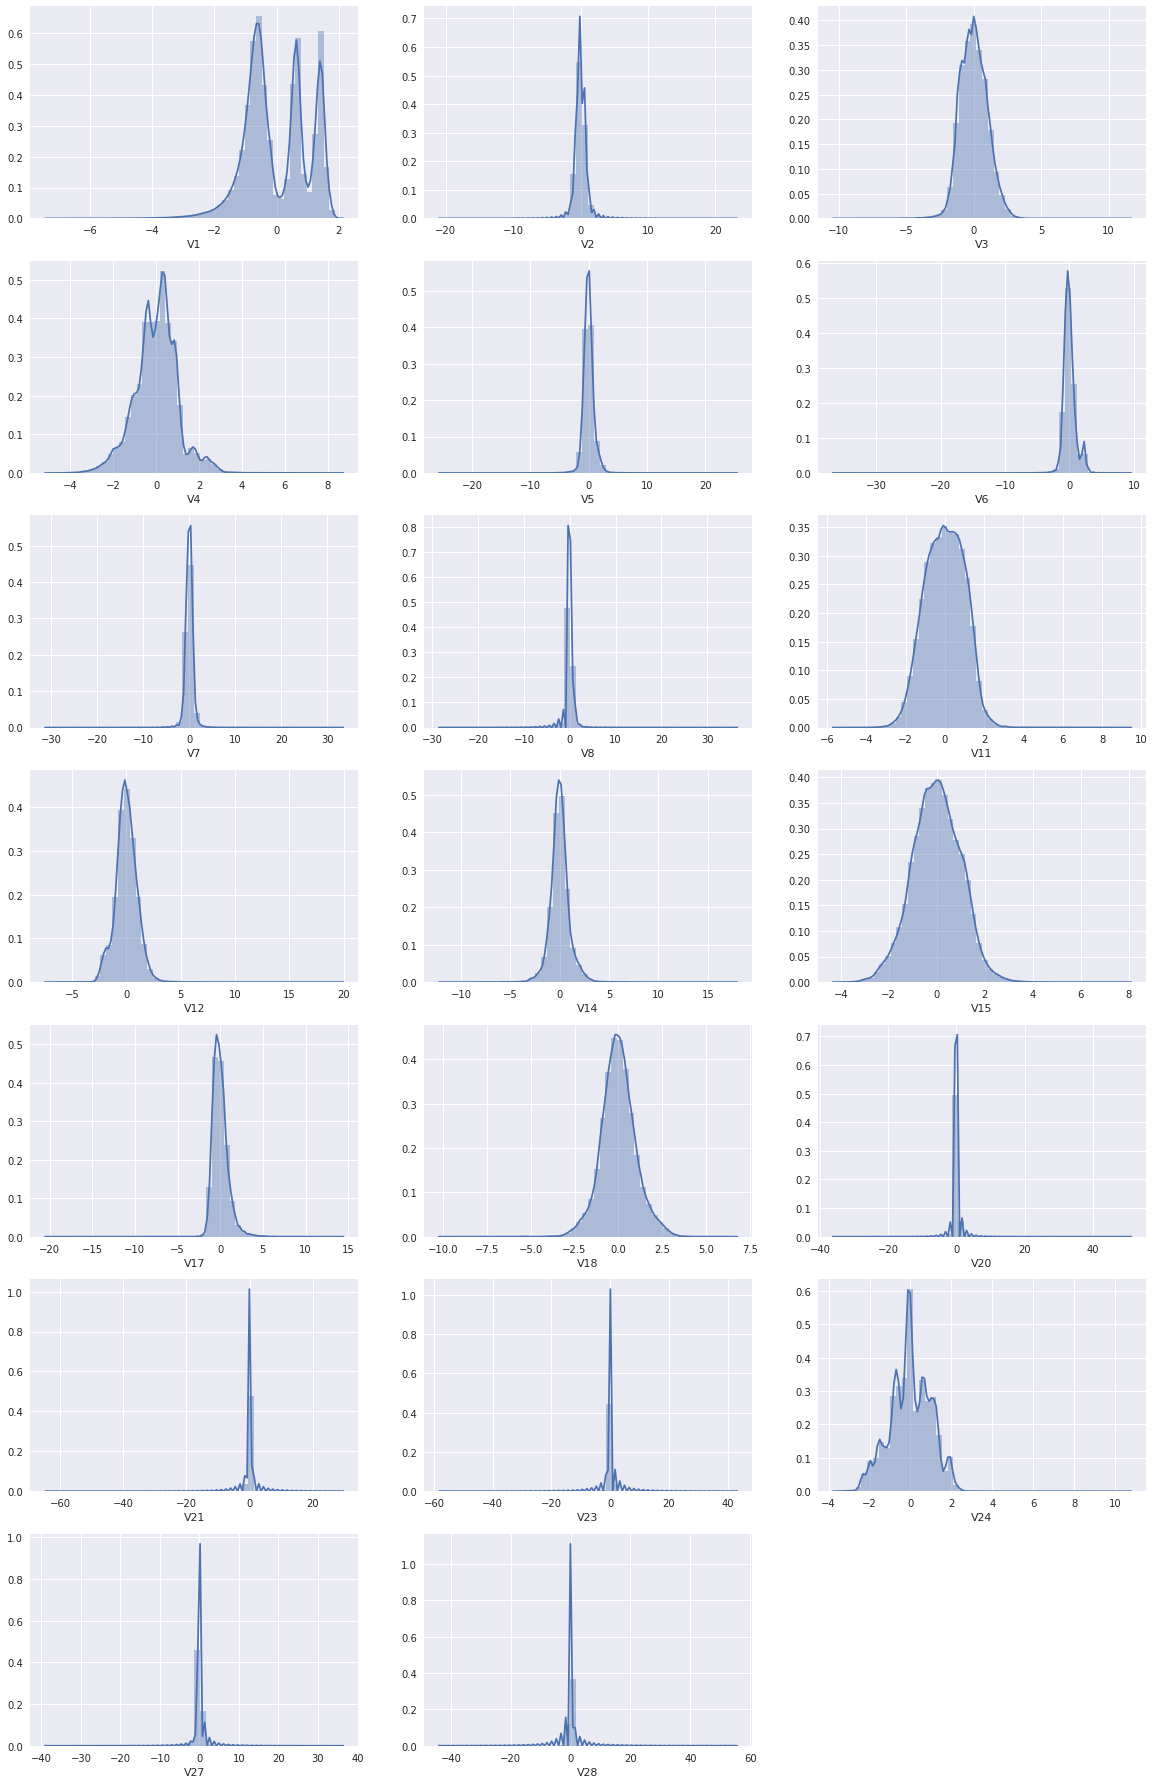

In [ ]:
plt.figure(figsize=(20,32))

for v in range (0, len(v_cols)):
    plt.subplot(7,3,v+1)
    sns.distplot(X_train[v_cols[v]])   

# Model Building (Imbalanced Class)


## Functions used during Modelling

In [15]:
# Metrics to used
def metricWithPredictions(orig,pred):
    confusionMatrix= confusion_matrix(orig, pred)
 
    TP = confusionMatrix[1,1] # true positive 
    TN = confusionMatrix[0,0] # true negatives
    FP = confusionMatrix[0,1] # false positives
    FN = confusionMatrix[1,0] # false negatives
  
    print("Confustion Matrix \n ")
    print(confusionMatrix)
    print("\n" )
    
    print("Accuracy    : ",(TP+TN)/(TP+TN+FP+FN))
    print("Recall      : ",recall_score(orig, pred))    
    print("Precision   : ",precision_score(orig, pred))  
    print("Sensitivity : ", TP / float(TP+FN))
    print("Specificty  : ",TN / float(TN+FP))

In [16]:
# ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [19]:
def getCutOffDf(y_pred_compare):
  cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
  num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  for i in num:
    cm1 = metrics.confusion_matrix(y_pred_compare.Actual_Fraud, y_pred_compare[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
  
  return cutoff_df

## Logistic Regression (Imbalanced Class)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
params_logistic = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

logistic=LogisticRegression(verbose = 3, warm_start = True,random_state=100,n_jobs=-1)

logitreg_grid = GridSearchCV(logistic, param_grid = params_logistic, scoring = 'roc_auc',cv=5)

logitreg_grid.fit(X_train, y_train)

print("Best Parameter", logitreg_grid.best_estimator_)
Y_train_pred=logitreg_grid.predict(X_train)
Y_train_pred_proba=logitreg_grid.predict_proba(X_train)

Y_test_pred=logitreg_grid.predict(X_test)
Y_test_pred_proba=logitreg_grid.predict_proba(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

Best Parameter LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=3,
                   warm_start=True)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.9s finished


In [ ]:
# metrics training data
metricWithPredictions(y_train,Y_train_pred)

Confustion Matrix 
 
[[198993     21]
 [   125    225]]


Accuracy    :  0.9992676711943982
Recall      :  0.6428571428571429
Precision   :  0.9146341463414634
Sensitivity :  0.6428571428571429
Specificty  :  0.9998944797853417


`Updating the hyperparameters for improvement`

In [ ]:
#Lets try to observe boundary distribution
y_train_pred_compare = pd.DataFrame({'Actual_Fraud':y_train.values, 'Fraud_prob':Y_train_pred_proba[:,1]})
y_train_pred_compare.head()

,Actual_Fraud,Fraud_prob
0,0,0.000106
1,0,0.000144
2,0,0.000222
3,0,0.000435
4,0,0.000203


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_compare['Actual_Fraud'], y_train_pred_compare['Fraud_prob'], drop_intermediate = False )

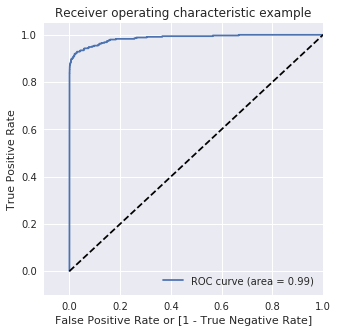

In [ ]:
draw_roc(y_train_pred_compare['Actual_Fraud'], y_train_pred_compare['Fraud_prob'])

In [ ]:
#Lets find the optimal cutoff
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_compare[i]= y_train_pred_compare.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_compare.head()

,Actual_Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000106,1,0,0,0,0,0,0,0,0,0
1,0,0.000144,1,0,0,0,0,0,0,0,0,0
2,0,0.000222,1,0,0,0,0,0,0,0,0,0
3,0,0.000435,1,0,0,0,0,0,0,0,0,0
4,0,0.000203,1,0,0,0,0,0,0,0,0,0


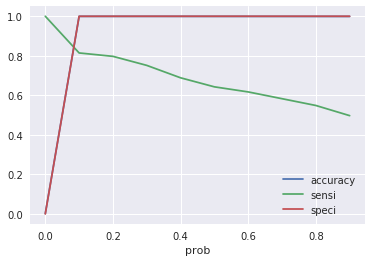

In [ ]:
cutOffdf.plot(x='prob',y=['accuracy','sensi','speci'],kind='line')

In [ ]:
#Taking cutoff at 0.1 Lets see if what is the performance of the model
y_train_pred_compare['final_predicted'] = y_train_pred_compare.Fraud_prob.map( lambda x: 1 if x > 0.08 else 0)
metricWithPredictions(y_train,y_train_pred_compare['final_predicted'])

Confustion Matrix 
 
[[198954     60]
 [    62    288]]


Accuracy    :  0.9993880540117573
Recall      :  0.8228571428571428
Precision   :  0.8275862068965517
Sensitivity :  0.8228571428571428
Specificty  :  0.9996985136724049


In [ ]:
# it same as max predicted value obtained
# Lets see the metrics on test Data
Y_test_pred_prob_compare = pd.DataFrame({'Actual_Fraud':y_test.values, 'Fraud_prob':Y_test_pred_proba[:,1]})
Y_test_pred_prob_compare['final_predicted'] = Y_test_pred_prob_compare.Fraud_prob.map( lambda x: 1 if x > 0.08 else 0)

metricWithPredictions(y_test,Y_test_pred_prob_compare['final_predicted'])

Confustion Matrix 
 
[[85256    45]
 [   32   110]]


Accuracy    :  0.9990988144142879
Recall      :  0.7746478873239436
Precision   :  0.7096774193548387
Sensitivity :  0.7746478873239436
Specificty  :  0.9994724563604178


## Decision Tree (Imbalanced Class)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(5,20,5)), 
              "min_samples_leaf": list(range(5,7,1))}

dTree=DecisionTreeClassifier(random_state=100)
dtree_grid = GridSearchCV(dTree, tree_params,cv=5,scoring="roc_auc",n_jobs=3)
dtree_grid.fit(X_train, y_train)

print("Best Parameters: ", dtree_grid.best_estimator_)

Y_train_pred=dtree_grid.predict(X_train)
Y_train_pred_proba=dtree_grid.predict_proba(X_train)

Y_test_pred=dtree_grid.predict(X_test)
Y_test_pred_proba=dtree_grid.predict_proba(X_test)


Best Parameters:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')


In [ ]:
#Lets whats the metrics we are getting with training data
metricWithPredictions(y_train,Y_train_pred)

Confustion Matrix 
 
[[199007      7]
 [    67    283]]


Accuracy    :  0.9996288196464758
Recall      :  0.8085714285714286
Precision   :  0.9758620689655172
Sensitivity :  0.8085714285714286
Specificty  :  0.9999648265951139


In [ ]:
#Lets try to observe boundary distribution
y_train_pred_compare = pd.DataFrame({'Actual_Fraud':y_train.values, 'Fraud_prob':Y_train_pred_proba[:,1]})
y_train_pred_compare.head()

,Actual_Fraud,Fraud_prob
0,0,0.000169
1,0,0.000169
2,0,0.000000
3,0,0.000169
4,0,0.000169


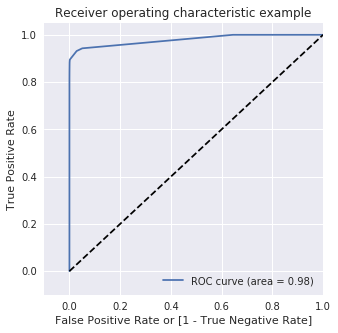

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_compare['Actual_Fraud'], y_train_pred_compare['Fraud_prob'], drop_intermediate = False )
draw_roc(y_train_pred_compare['Actual_Fraud'], y_train_pred_compare['Fraud_prob'])

In [ ]:
#Lets find the optimal cutoff
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_compare[i]= y_train_pred_compare.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_compare.head()

,Actual_Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000169,1,0,0,0,0,0,0,0,0,0
1,0,0.000169,1,0,0,0,0,0,0,0,0,0
2,0,0.000000,0,0,0,0,0,0,0,0,0,0
3,0,0.000169,1,0,0,0,0,0,0,0,0,0
4,0,0.000169,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df=getCutOffDf(y_train_pred_compare)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.356609  1.000000  0.355478
0.1   0.1  0.999167  0.882857  0.999372
0.2   0.2  0.999544  0.840000  0.999824
0.3   0.3  0.999609  0.820000  0.999925
0.4   0.4  0.999629  0.808571  0.999965
0.5   0.5  0.999629  0.808571  0.999965
0.6   0.6  0.999629  0.808571  0.999965
0.7   0.7  0.999629  0.808571  0.999965
0.8   0.8  0.999629  0.808571  0.999965
0.9   0.9  0.999629  0.808571  0.999965


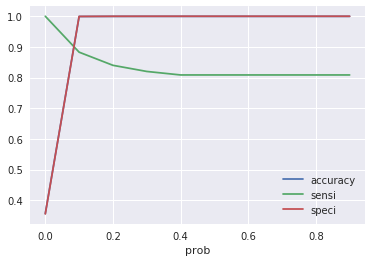

In [ ]:
cutoff_df.plot(x='prob',y=['accuracy','sensi','speci'],kind='line')

In [ ]:
#Taking cutoff at 0.1 Lets see if what is the performance of the model
y_train_pred_compare['final_predicted'] = y_train_pred_compare.Fraud_prob.map( lambda x: 1 if x > 0.08 else 0)
metricWithPredictions(y_train,y_train_pred_compare['final_predicted'])

Confustion Matrix 
 
[[198889    125]
 [    41    309]]


Accuracy    :  0.9991673521799321
Recall      :  0.8828571428571429
Precision   :  0.7119815668202765
Sensitivity :  0.8828571428571429
Specificty  :  0.999371903484177


In [ ]:
# it same as max predicted value obtained
# Lets see the metrics on test Data
Y_test_pred_prob_compare = pd.DataFrame({'Actual_Fraud':y_test.values, 'Fraud_prob':Y_test_pred_proba[:,1]})
Y_test_pred_prob_compare['final_predicted'] = Y_test_pred_prob_compare.Fraud_prob.map( lambda x: 1 if x > 0.08 else 0)

metricWithPredictions(y_test,Y_test_pred_prob_compare['final_predicted'])

Confustion Matrix 
 
[[85230    71]
 [   27   115]]


Accuracy    :  0.9988530365272755
Recall      :  0.8098591549295775
Precision   :  0.6182795698924731
Sensitivity :  0.8098591549295775
Specificty  :  0.9991676533686592


## SVM (Imbalanced Class)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_params = {'C': [0.01,0.1,0.5], 'kernel': ['rbf','sigmoid', 'linear']}

svc_al=SVC(random_state=100)
svc_grid = GridSearchCV(svc_al, svc_params,cv=5,scoring="roc_auc",n_jobs=-1)
svc_grid.fit(X_train, y_train)

print("Best Parameters: ", svc_grid.best_estimator_)

Y_train_pred=svc_grid.predict(X_train)
Y_test_pred=svc_grid.predict(X_test)

Best Parameters:  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False)


- `SVM` Metrics With Train Data

In [ ]:
metricWithPredictions(y_train,Y_train_pred)

Confustion Matrix 
 
[[198968     46]
 [    65    285]]


Accuracy    :  0.9994432294697136
Recall      :  0.8142857142857143
Precision   :  0.8610271903323263
Sensitivity :  0.8142857142857143
Specificty  :  0.9997688604821772


- `SVM` Metrics With Test Data

In [ ]:
metricWithPredictions(y_test,Y_test_pred)

Confustion Matrix 
 
[[85270    31]
 [   37   105]]


Accuracy    :  0.999204147794436
Recall      :  0.7394366197183099
Precision   :  0.7720588235294118
Sensitivity :  0.7394366197183099
Specificty  :  0.9996365810482878


## KNN (Imbalanced Class)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_params = {"n_neighbors": list(range(3,9,2))}

knn=KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(knn, knn_params,cv=5,scoring="roc_auc",n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("Best Parameters: ", knn_grid.best_estimator_)

Y_train_pred=knn_grid.predict(X_train)
Y_test_pred=knn_grid.predict(X_test)

Best Parameters:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='uniform')


- `KNN` Metrics With Train Data

In [ ]:
metricWithPredictions(y_train,Y_train_pred)

Confustion Matrix 
 
[[198991     23]
 [    73    277]]


Accuracy    :  0.9995184687305632
Recall      :  0.7914285714285715
Precision   :  0.9233333333333333
Sensitivity :  0.7914285714285715
Specificty  :  0.9998844302410885


- `KNN` Metrics With Test Data

In [ ]:
metricWithPredictions(y_test,Y_test_pred)

Confustion Matrix 
 
[[85278    23]
 [   36   106]]


Accuracy    :  0.9993094811745842
Recall      :  0.7464788732394366
Precision   :  0.8217054263565892
Sensitivity :  0.7464788732394366
Specificty  :  0.9997303665842135


## XGBoost (Imbalanced Class)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'max_depth': [3,5,8],
              'min_child_weight': [11],
              'colsample_bytree': [0.7],
              'n_estimators': [100,200] 
              }

xgBoost = XGBClassifier(random_state=100)
xgBoost_grid = GridSearchCV(xgBoost, parameters, cv=5,scoring="roc_auc",n_jobs=10)

xgBoost_grid.fit(X_train,y_train)
print("Best Parameters: ", xgBoost_grid.best_estimator_)

Best Parameters:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=11, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
Y_train_pred=xgBoost_grid.predict(X_train)
Y_test_pred=xgBoost_grid.predict(X_test)

- `XGBoost` Metrics With Train Data

In [ ]:
metricWithPredictions(y_train,Y_train_pred)

Confustion Matrix 
 
[[199003     11]
 [    59    291]]


Accuracy    :  0.999648883449369
Recall      :  0.8314285714285714
Precision   :  0.9635761589403974
Sensitivity :  0.8314285714285714
Specificty  :  0.9999447275066076


- `XGBoost` Metrics With Test Data

In [ ]:
metricWithPredictions(y_test,Y_test_pred)

Confustion Matrix 
 
[[85280    21]
 [   35   107]]


Accuracy    :  0.9993445923013002
Recall      :  0.7535211267605634
Precision   :  0.8359375
Sensitivity :  0.7535211267605634
Specificty  :  0.999753812968195


## Random Forest (Imbalanced Class)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Taking more than 12 Hrs to Execute, TimedOut. We will continue with 4 Models

## Comparing Metrices (Imbalanced Class)

In [108]:
import pandas as pd

metrics_imbalanced = [['Logistic Regression', 'No', 0.9990988144142879, 0.7746478873239436, 0.7096774193548387, 0.7746478873239436, 0.9994724563604178],
            ['Decision Tree', 'No', 0.9988530365272755, 0.8098591549295775, 0.6182795698924731, 0.8098591549295775, 0.9991676533686592],
            ['SVM', 'No', 0.999204147794436, 0.7394366197183099, 0.7720588235294118, 0.7394366197183099, 0.9996365810482878],
            ['KNN', 'No', 0.9993094811745842, 0.7464788732394366, 0.8217054263565892, 0.7464788732394366, 0.9997303665842135],
            ['XGBoost', 'No', 0.9993445923013002, 0.7535211267605634, 0.8359375, 0.7535211267605634, 0.999753812968195]]
# Create the pandas DataFrame 
metrics_imbalanced = pd.DataFrame(metrics_imbalanced, columns = ['Model', 'Balancing', 'Accuracy', 'Recall', 'Precision','Sensitivity','Specificty'  ]) 
  
metrics_imbalanced

,Model,Balancing,Accuracy,Recall,Precision,Sensitivity,Specificty
0,Logistic Regression,No,0.999099,0.774648,0.709677,0.774648,0.999472
1,Decision Tree,No,0.998853,0.809859,0.618280,0.809859,0.999168
2,SVM,No,0.999204,0.739437,0.772059,0.739437,0.999637
3,KNN,No,0.999309,0.746479,0.821705,0.746479,0.999730
4,XGBoost,No,0.999345,0.753521,0.835938,0.753521,0.999754


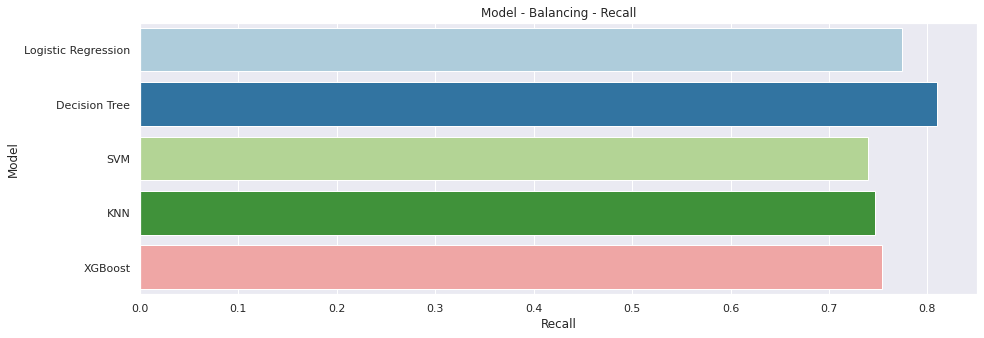

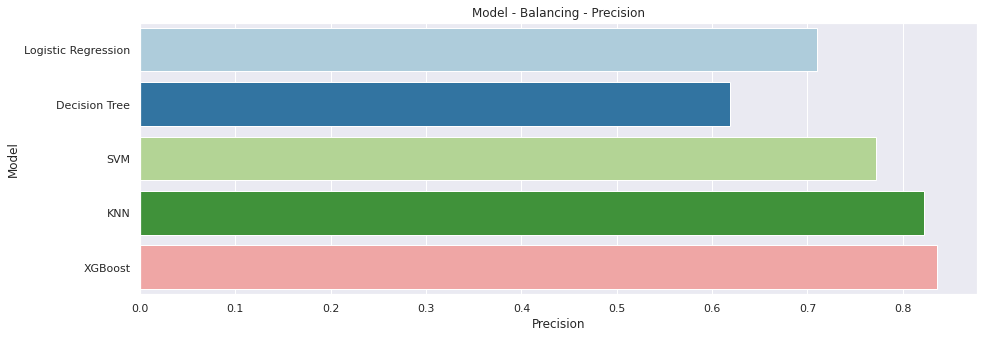

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 5))

plt.title("Model - Balancing - Recall")
plt.xlabel("Recall")
plt.ylabel("Model")
sns.set(style="darkgrid")

# sns.set(style="whitegrid")
ax = sns.barplot(y = "Model", 
                 x = "Recall", 
                 data = metrics_imbalanced,
                 palette="Paired")
plt.show()

print('\n')

plt.figure(figsize = (15, 5))

plt.title("Model - Balancing - Precision")
plt.xlabel("Precision")
plt.ylabel("Model")
sns.set(style="darkgrid")

# sns.set(style="whitegrid")
ax = sns.barplot(y = "Model",  
                 x = "Precision",
                 data = metrics_imbalanced,
                 palette="Paired")
plt.show()

print('\n')

## Final Model (Imbalanced Class)

** After analysing the all models, taking into consideration `Precision` and `Recall` we will go with `Decision Tree`**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_params = {"criterion": ["entropy"], "max_depth": list(range(5,20,5)), 
              "min_samples_leaf": list(range(5,7,1))}

clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


In [ ]:
metricWithPredictions(y_train,Y_train_pred)

Confustion Matrix 
 
[[199014      0]
 [     0    350]]


Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
Sensitivity :  1.0
Specificty  :  1.0


In [ ]:
metricWithPredictions(y_test,y_test_pred)

Confustion Matrix 
 
[[85246    55]
 [   37   105]]


Accuracy    :  0.9989232587807076
Recall      :  0.7394366197183099
Precision   :  0.65625
Sensitivity :  0.7394366197183099
Specificty  :  0.9993552244405106


Top var = 17
2nd Top var = 14
3rd Top var = 12


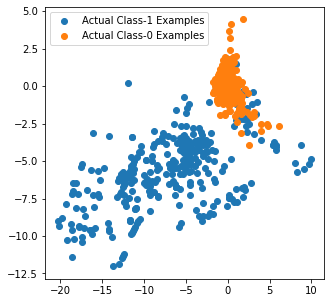

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Model Building (SMOTE)

## Class Distribution after applying SMOTE

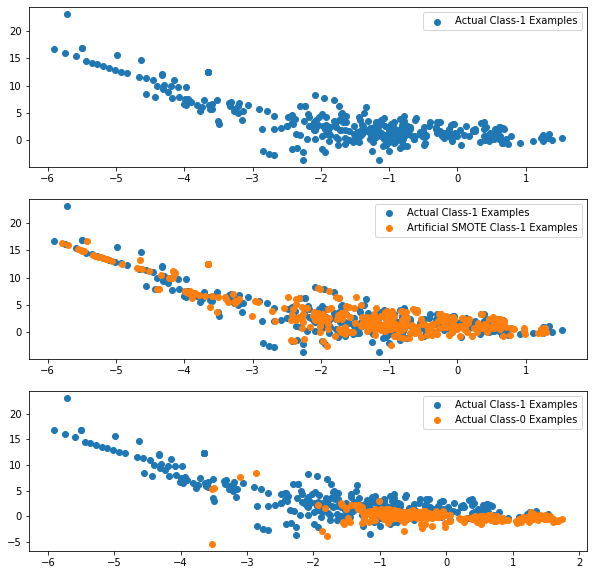

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# X_ada = pd.DataFrame(data = X_ada, columns = X.columns)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print(X_train.shape)
print(X_train_smote.shape)
print(np.unique(y_train_smote, return_counts=True))

(199364, 29)
(398028, 29)
(array([0, 1]), array([199014, 199014]))


## Decision Tree (SMOTE)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dTree=DecisionTreeClassifier(random_state=100)
dtree_grid = GridSearchCV(dTree, tree_params,cv=5,scoring="roc_auc",n_jobs=3)
dtree_grid.fit(X_train_smote, y_train_SMOTE)

print("Best Parameters: ", dtree_grid.best_estimator_)

Y_train_pred=dtree_grid.predict(X_train_smote)
Y_train_pred_proba=dtree_grid.predict_proba(X_train_smote)

Y_test_pred=dtree_grid.predict(X_test)
Y_test_pred_proba=dtree_grid.predict_proba(X_test)

Best Parameters:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')


In [ ]:
print(y_train.shape)
print(Y_train_pred.shape)

(199364,)
(398028,)


In [ ]:
metricWithPredictions(y_train_smote,Y_train_pred)

Confustion Matrix 
 
[[198033    981]
 [   164 198850]]


Accuracy    :  0.9971233179575306
Recall      :  0.9991759373712402
Precision   :  0.9950908517697454
Sensitivity :  0.9991759373712402
Specificty  :  0.995070698543821


In [ ]:
#Lets try to observe boundary distribution
y_train_pred_compare = pd.DataFrame({'Actual_Fraud':y_train_smote, 'Fraud_prob':Y_train_pred_proba[:,1]})
y_train_pred_compare.head()

,Actual_Fraud,Fraud_prob
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


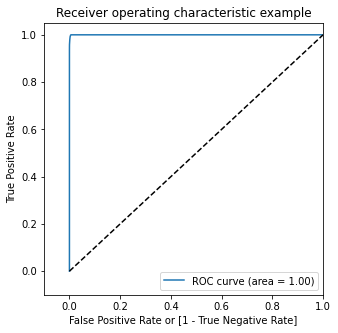

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_compare['Actual_Fraud'], y_train_pred_compare['Fraud_prob'], drop_intermediate = False )
draw_roc(y_train_pred_compare['Actual_Fraud'], y_train_pred_compare['Fraud_prob'])

In [ ]:
#Lets find the optimal cutoff
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_compare[i]= y_train_pred_compare.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_compare.head()

,Actual_Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df=getCutOffDf(y_train_pred_compare)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.996460  1.000000  0.992920
0.1   0.1  0.996460  1.000000  0.992920
0.2   0.2  0.996591  0.999935  0.993247
0.3   0.3  0.997050  0.999578  0.994523
0.4   0.4  0.997121  0.999432  0.994809
0.5   0.5  0.997123  0.999176  0.995071
0.6   0.6  0.997121  0.999151  0.995091
0.7   0.7  0.997055  0.998890  0.995221
0.8   0.8  0.994744  0.992272  0.997216
0.9   0.9  0.994063  0.990674  0.997452


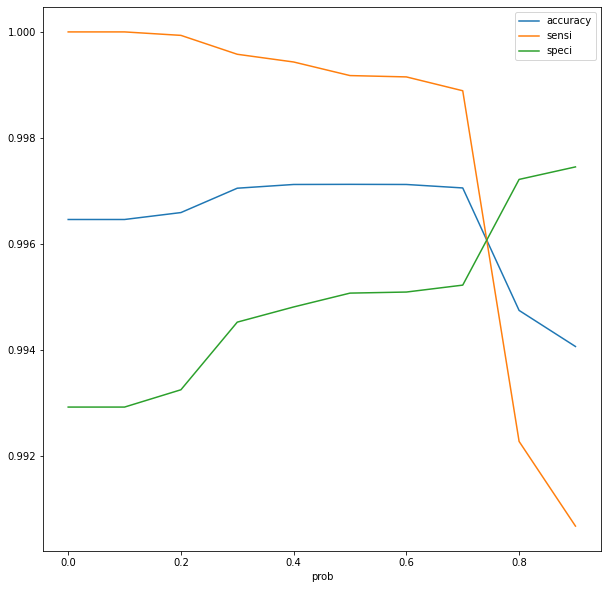

In [ ]:
cutoff_df.plot(x='prob',y=['accuracy','sensi','speci'],kind='line')

In [ ]:
#Taking cutoff at 0.1 Lets see if what is the performance of the model
y_train_pred_compare['final_predicted'] = y_train_pred_compare.Fraud_prob.map( lambda x: 1 if x > 0.996 else 0)
metricWithPredictions(y_train_smote,y_train_pred_compare['final_predicted'])

Confustion Matrix 
 
[[199008      6]
 [ 13288 185726]]


Accuracy    :  0.9666003396745958
Recall      :  0.933230827981951
Precision   :  0.9999676953890552
Sensitivity :  0.933230827981951
Specificty  :  0.9999698513672405


In [ ]:
# it same as max predicted value obtained
# Lets see the metrics on test Data
Y_test_pred_prob_compare = pd.DataFrame({'Actual_Fraud':y_test.values, 'Fraud_prob':Y_test_pred_proba[:,1]})
Y_test_pred_prob_compare['final_predicted'] = Y_test_pred_prob_compare.Fraud_prob.map( lambda x: 1 if x > 0.08 else 0)

metricWithPredictions(y_test,Y_test_pred_prob_compare['final_predicted'])

Confustion Matrix 
 
[[84565   736]
 [   30   112]]


Accuracy    :  0.9910349589785002
Recall      :  0.7887323943661971
Precision   :  0.1320754716981132
Sensitivity :  0.7887323943661971
Specificty  :  0.9913717306948336


## SVM (SMOTE)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_params = {'C': [0.01,0.1,0.5], 'kernel': ['rbf','sigmoid', 'linear']}

svc_al=SVC(random_state=100)
svc_grid = GridSearchCV(svc_al, svc_params,cv=5,scoring="roc_auc",n_jobs=-1)
svc_grid.fit(X_train_smote, y_train_smote)

print("Best Parameters: ", svc_grid.best_estimator_)

Y_train_pred=svc_grid.predict(X_train_smote)
Y_test_pred=svc_grid.predict(X_test)

In [ ]:
metricWithPredictions(y_train_smote,Y_train_pred)

Confustion Matrix 
 
[[198033    981]
 [   164 198850]]


Accuracy    :  0.9971233179575306
Recall      :  0.9991759373712402
Precision   :  0.9950908517697454
Sensitivity :  0.9991759373712402
Specificty  :  0.995070698543821


In [ ]:
metricWithPredictions(y_test,Y_test_pred)

Confustion Matrix 
 
[[84783   518]
 [   30   112]]


Accuracy    :  0.9935863675198671
Recall      :  0.7887323943661971
Precision   :  0.17777777777777778
Sensitivity :  0.7887323943661971
Specificty  :  0.9939273865488095


## KNN (SMOTE)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_params = {"n_neighbors": list(range(3,9,2))}

knn=KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(knn, knn_params,cv=5,scoring="roc_auc",n_jobs=-1)
knn_grid.fit(X_train_smote, y_train_smote)

print("Best Parameters: ", knn_grid.best_estimator_)

Y_train_pred=knn_grid.predict(X_train_smote)
Y_test_pred=knn_grid.predict(X_test)

Best Parameters:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
metricWithPredictions(y_train_smote,Y_train_pred)

Confustion Matrix 
 
[[198826    188]
 [     0 199014]]


Accuracy    :  0.9995276714201011
Recall      :  1.0
Precision   :  0.9990562343751569
Sensitivity :  1.0
Specificty  :  0.9990553428402021


In [ ]:
metricWithPredictions(y_test,Y_test_pred)

Confustion Matrix 
 
[[85164   137]
 [   25   117]]


Accuracy    :  0.9981039991573329
Recall      :  0.823943661971831
Precision   :  0.46062992125984253
Sensitivity :  0.823943661971831
Specificty  :  0.998393922697272


## XGBoost (SMOTE)

In [ ]:
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

In [ ]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train_smote = pd.DataFrame(data = X_train_smote, columns = X.columns)

In [ ]:
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'max_depth': [3,5,8],
              'min_child_weight': [11],
              'colsample_bytree': [0.7],
              'n_estimators': [100,200] 
              }

xgBoost = XGBClassifier(random_state=100)
xgBoost_grid = GridSearchCV(xgBoost, parameters, cv=5,scoring="roc_auc",n_jobs=10)

xgBoost_grid.fit(X_train_smote,y_train_smote)
print("Best Parameters: ", xgBoost_grid.best_estimator_)

Best Parameters:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=11, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
Y_train_pred=xgBoost_grid.predict(X_train_smote)
Y_test_pred=xgBoost_grid.predict(X_test)

In [ ]:
metricWithPredictions(y_train_smote,Y_train_pred)

Confustion Matrix 
 
[[198977     37]
 [     0 199014]]


Accuracy    :  0.9999070417156581
Recall      :  1.0
Precision   :  0.9998141179898619
Sensitivity :  1.0
Specificty  :  0.9998140834313164


In [ ]:
metricWithPredictions(y_test,Y_test_pred)

Confustion Matrix 
 
[[85225    76]
 [   24   118]]


Accuracy    :  0.9988296291094648
Recall      :  0.8309859154929577
Precision   :  0.6082474226804123
Sensitivity :  0.8309859154929577
Specificty  :  0.9991090374087056


# Model building (ADASYN)

## Class Distribution after applying ADASYN

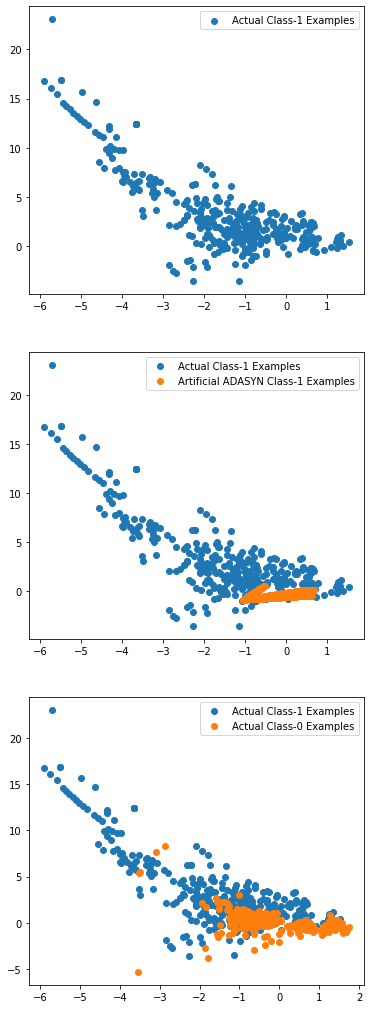

In [ ]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 18]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Decision Tree (ADASYN)

In [ ]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_train_adasyn = pd.DataFrame(data = X_train_adasyn, columns = X_train.columns)

In [ ]:
dTree=DecisionTreeClassifier(random_state=100)
dtree_grid = GridSearchCV(dTree, tree_params,cv=5,scoring="roc_auc",n_jobs=3)
dtree_grid.fit(X_train_adasyn, y_train_adasyn)

print("Best Parameters: ", dtree_grid.best_estimator_)

Best Parameters:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')


In [ ]:
Y_train_pred=dtree_grid.predict(X_train_adasyn)
Y_train_pred_proba=dtree_grid.predict_proba(X_train_adasyn)

Y_test_pred=dtree_grid.predict(X_test)
Y_test_pred_proba=dtree_grid.predict_proba(X_test)

In [ ]:
metricWithPredictions(y_train_adasyn,Y_train_pred)

Confustion Matrix 
 
[[189099   9915]
 [   928 198113]]


Accuracy    :  0.9727600457223248
Recall      :  0.9953376440029944
Precision   :  0.9523381467879324
Sensitivity :  0.9953376440029944
Specificty  :  0.950179384364919


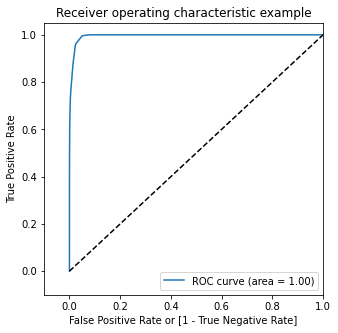

In [ ]:
#Lets try to observe boundary distribution
y_train_pred_compare = pd.DataFrame({'Actual_Fraud':y_train_adasyn, 'Fraud_prob':Y_train_pred_proba[:,1]})
y_train_pred_compare.head()

fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_compare['Actual_Fraud'], y_train_pred_compare['Fraud_prob'], drop_intermediate = False )
draw_roc(y_train_pred_compare['Actual_Fraud'], y_train_pred_compare['Fraud_prob'])

In [ ]:
#Lets find the optimal cutoff
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_compare[i]= y_train_pred_compare.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_compare.head()

,Actual_Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df=getCutOffDf(y_train_pred_compare)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.954094  1.000000  0.908182
0.1   0.1  0.967304  0.998196  0.936406
0.2   0.2  0.972589  0.995589  0.949586
0.3   0.3  0.972745  0.995383  0.950104
0.4   0.4  0.972760  0.995353  0.950164
0.5   0.5  0.972760  0.995338  0.950179
0.6   0.6  0.968803  0.965243  0.972364
0.7   0.7  0.968040  0.961264  0.974816
0.8   0.8  0.965892  0.954788  0.976997
0.9   0.9  0.930902  0.875860  0.985951


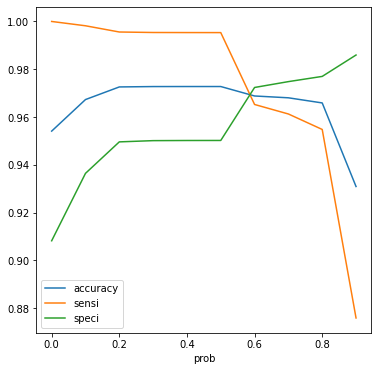

In [ ]:
plt.rcParams['figure.figsize'] = [6, 6]
cutoff_df.plot(x='prob',y=['accuracy','sensi','speci'],kind='line')

In [ ]:
y_train_pred_compare['final_predicted'] = y_train_pred_compare.Fraud_prob.map( lambda x: 1 if x > 0.97 else 0)

metricWithPredictions(y_train_adasyn,y_train_pred_compare['final_predicted'])

Confustion Matrix 
 
[[198297    717]
 [ 53378 145663]]


Accuracy    :  0.864101694489455
Recall      :  0.7318240965429234
Precision   :  0.995101789862003
Sensitivity :  0.7318240965429234
Specificty  :  0.9963972383852392


In [ ]:
# it same as max predicted value obtained
# Lets see the metrics on test Data
Y_test_pred_prob_compare = pd.DataFrame({'Actual_Fraud':y_test.values, 'Fraud_prob':Y_test_pred_proba[:,1]})
Y_test_pred_prob_compare['final_predicted'] = Y_test_pred_prob_compare.Fraud_prob.map( lambda x: 1 if x > 0.97 else 0)

In [ ]:
metricWithPredictions(y_test,Y_test_pred_prob_compare['final_predicted'])

Confustion Matrix 
 
[[84968   333]
 [   34   108]]


Accuracy    :  0.9957047388317358
Recall      :  0.7605633802816901
Precision   :  0.24489795918367346
Sensitivity :  0.7605633802816901
Specificty  :  0.9960961770670919


## SVM (ADASYN)

In [79]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_train_adasyn = pd.DataFrame(data = X_train_adasyn, columns = X_train.columns)

In [80]:
from sklearn.svm import SVC

In [84]:
svc_params = {'C': [0.01,0.1,0.5], 'kernel': ['rbf','sigmoid', 'linear']}

svc_al=SVC(random_state=100)
svc_grid = GridSearchCV(svc_al, svc_params,cv=5,scoring="roc_auc",n_jobs=-1)
svc_grid.fit(X_train_adasyn, y_train_adasyn)

Y_train_pred=svc_grid.predict(X_train_adasyn)
Y_test_pred=svc_grid.predict(X_test)

In [83]:
metricWithPredictions(y_train_adasyn,Y_train_pred)

Confustion Matrix 
 
[[198977     37]
 [     0 199014]]


Accuracy    :  0.9999070417156581
Recall      :  1.0
Precision   :  0.9998141179898619
Sensitivity :  1.0
Specificty  :  0.9998140834313164


In [84]:
metricWithPredictions(y_test,Y_test_pred)

Confustion Matrix 
 
[[85225    76]
 [   24   118]]


Accuracy    :  0.9988296291094648
Recall      :  0.8309859154929577
Precision   :  0.6082474226804123
Sensitivity :  0.8309859154929577
Specificty  :  0.9991090374087056


## KNN (ADASYN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn import over_sampling

In [ ]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_train_adasyn = pd.DataFrame(data = X_train_adasyn, columns = X.columns)

In [ ]:
knn_params = {"n_neighbors": list(range(3,9,2))}

knn=KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(knn, knn_params,cv=5,scoring="roc_auc",n_jobs=-1)
knn_grid.fit(X_train_adasyn, y_train_adasyn)

print("Best Parameters: ", knn_grid.best_estimator_)

Y_train_pred=knn_grid.predict(X_train_adasyn)
Y_test_pred=knn_grid.predict(X_test)

Best Parameters:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='uniform')


In [ ]:
metricWithPredictions(y_train_adasyn,Y_train_pred)

Confustion Matrix 
 
[[198718    296]
 [     0 199041]]


Accuracy    :  0.999256384168017
Recall      :  1.0
Precision   :  0.9985150774818523
Sensitivity :  1.0
Specificty  :  0.9985126674505311


In [ ]:
metricWithPredictions(y_test,Y_test_pred)

Confustion Matrix 
 
[[85109   192]
 [   25   117]]


Accuracy    :  0.9974602951675386
Recall      :  0.823943661971831
Precision   :  0.3786407766990291
Sensitivity :  0.823943661971831
Specificty  :  0.9977491471377826


## XGBoost (ADASYN)

In [ ]:
from imblearn import over_sampling
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

In [ ]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_train_adasyn = pd.DataFrame(data = X_train_adasyn, columns = X.columns)

In [ ]:
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'max_depth': [3,5,8],
              'min_child_weight': [11],
              'colsample_bytree': [0.7],
              'n_estimators': [100,200] 
              }

xgBoost = XGBClassifier(random_state=100)
xgBoost_grid = GridSearchCV(xgBoost, parameters, cv=5,scoring="roc_auc",n_jobs=10)

xgBoost_grid.fit(X_train_adasyn,y_train_adasyn)
print("Best Parameters: ", xgBoost_grid.best_estimator_)

Best Parameters:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=11, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
Y_train_pred=xgBoost_grid.predict(X_train_adasyn)
Y_test_pred=xgBoost_grid.predict(X_test)

In [ ]:
metricWithPredictions(y_train_adasyn,Y_train_pred)

Confustion Matrix 
 
[[198974     40]
 [     0 199041]]


Accuracy    :  0.9998995113740563
Recall      :  1.0
Precision   :  0.9997990767577016
Sensitivity :  1.0
Specificty  :  0.9997990091149367


In [ ]:
metricWithPredictions(y_test,Y_test_pred)

Confustion Matrix 
 
[[85211    90]
 [   27   115]]


Accuracy    :  0.9986306660580738
Recall      :  0.8098591549295775
Precision   :  0.5609756097560976
Sensitivity :  0.8098591549295775
Specificty  :  0.9989449127208356


# Final Model Based On Oversampling Method

The models took significant time to run and were run over diffrent separate sessions. 
It was difficult to get the run time value, so we have collected all the metrics from all the Model and created a datframe for Visual Comparsion of the metrices.

Recall and Sensitivity are same, we have kept both for self refence in the  function `metricWithPredictions`

## Comparing Metrices (Model + Over-Sampling)

In [115]:
import pandas as pd

metrics = [['Decision Tree', 'No', 0.9988530365272755, 0.8098591549295775, 0.6182795698924731, 0.8098591549295775, 0.9991676533686592],
            ['SVM', 'No', 0.999204147794436, 0.7394366197183099, 0.7720588235294118, 0.7394366197183099, 0.9996365810482878],
            ['KNN', 'No', 0.9993094811745842, 0.7464788732394366, 0.8217054263565892, 0.7464788732394366, 0.9997303665842135],
            ['XGBoost', 'No', 0.9993445923013002, 0.7535211267605634, 0.8359375, 0.7535211267605634, 0.999753812968195],
            ['Decision Tree', 'SMOTE', 0.9910349589785002, 0.7887323943661971, 0.1320754716981132, 0.7887323943661971, 0.9913717306948336],
            ['SVM', 'SMOTE', 0.9935863675198671, 0.7887323943661971, 0.17777777777777778, 0.7887323943661971, 0.9939273865488095],
            ['KNN', 'SMOTE', 0.9981039991573329, 0.823943661971831, 0.46062992125984253, 0.823943661971831, 0.998393922697272],
            ['XGBoost', 'SMOTE', 0.9988296291094648, 0.8309859154929577, 0.6082474226804123, 0.8309859154929577, 0.9991090374087056],
            ['Decision Tree', 'ADASYN', 0.9957047388317358, 0.7605633802816901, 0.24489795918367346, 0.7605633802816901, 0.9960961770670919],
            ['SVM', 'ADASYN', 0.9935863675198671, 0.8218637368732, 0.2199740921778, 0.8387323943661971, 0.9939273865488095],
            ['KNN', 'ADASYN', 0.9974602951675386, 0.823943661971831, 0.3786407766990291, 0.823943661971831, 0.9977491471377826],
            ['XGBoost', 'ADASYN', 0.9986306660580738, 0.8098591549295775, 0.5609756097560976, 0.8098591549295775, 0.9989449127208356]]
# Create the pandas DataFrame 
df_metrics = pd.DataFrame(metrics, columns = ['Model', 'Balancing', 'Accuracy', 'Recall', 'Precision','Sensitivity','Specificity'  ]) 
  
df_metrics

,Model,Balancing,Accuracy,Recall,Precision,Sensitivity,Specificity
0,Decision Tree,No,0.998853,0.809859,0.618280,0.809859,0.999168
1,SVM,No,0.999204,0.739437,0.772059,0.739437,0.999637
2,KNN,No,0.999309,0.746479,0.821705,0.746479,0.999730
3,XGBoost,No,0.999345,0.753521,0.835938,0.753521,0.999754
4,Decision Tree,SMOTE,0.991035,0.788732,0.132075,0.788732,0.991372
5,SVM,SMOTE,0.993586,0.788732,0.177778,0.788732,0.993927
6,KNN,SMOTE,0.998104,0.823944,0.460630,0.823944,0.998394
7,XGBoost,SMOTE,0.998830,0.830986,0.608247,0.830986,0.999109
8,Decision Tree,ADASYN,0.995705,0.760563,0.244898,0.760563,0.996096
9,SVM,ADASYN,0.993586,0.821864,0.219974,0.838732,0.993927


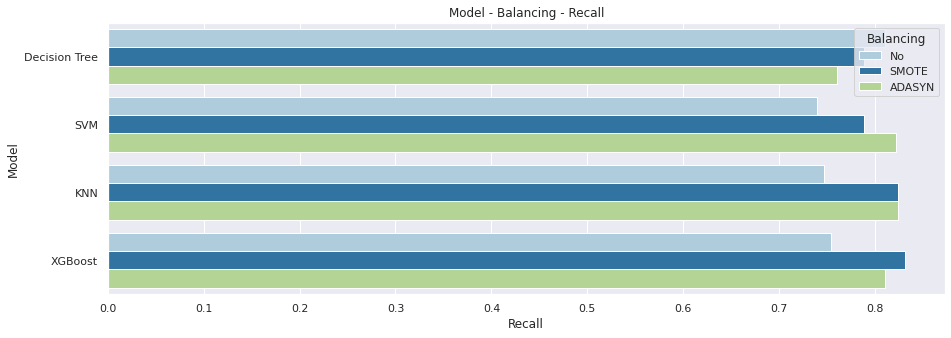

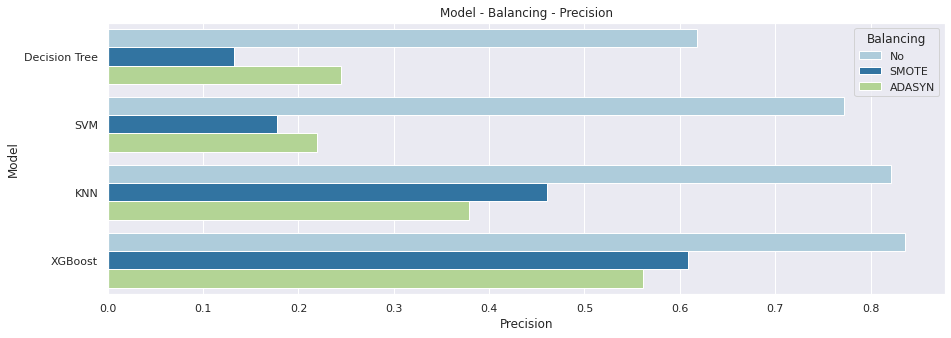

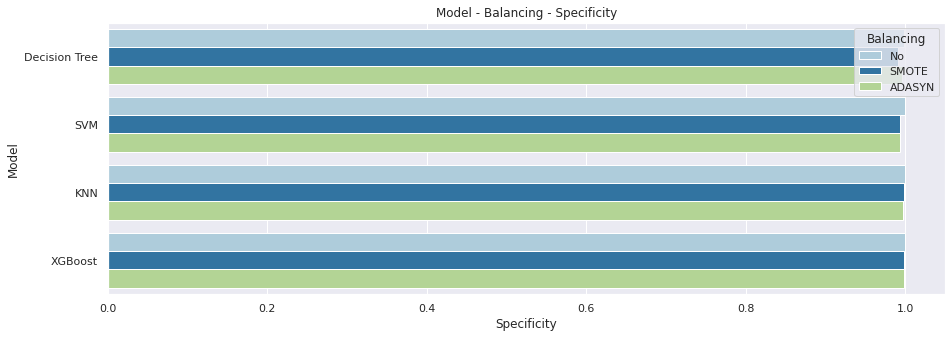

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 5))

plt.title("Model - Balancing - Recall")
plt.xlabel("Recall")
plt.ylabel("Model")
sns.set(style="darkgrid")

# sns.set(style="whitegrid")
ax = sns.barplot(y = "Model", 
                 x = "Recall", 
                 hue= 'Balancing', 
                 data = df_metrics,
                 palette="Paired")
plt.show()

print('\n')

plt.figure(figsize = (15, 5))

plt.title("Model - Balancing - Precision")
plt.xlabel("Precision")
plt.ylabel("Model")
sns.set(style="darkgrid")

# sns.set(style="whitegrid")
ax = sns.barplot(y = "Model", 
                 x = "Precision", 
                 hue= 'Balancing', 
                 data = df_metrics,
                 palette="Paired")
plt.show()

print('\n')


plt.figure(figsize = (15, 5))

plt.title("Model - Balancing - Specificity")
plt.xlabel("Specificity")
plt.ylabel("Model")
sns.set(style="darkgrid")

# sns.set(style="whitegrid")
ax = sns.barplot(y = "Model", 
                 x = "Specificity", 
                 hue= 'Balancing', 
                 data = df_metrics,
                 palette="Paired")
plt.show()

print('\n')

- Imbalanced Data: Decision Tree with no Over Sampling

- Balanced Data: XGBoost over sampled with SMOTE(Highest Recall Value)

## Final Model (XGBoost +  SMOTE)

In [52]:
from imblearn import over_sampling
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

In [53]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train_smote = pd.DataFrame(data = X_train_smote, columns = X.columns)

In [54]:
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'max_depth': [3,5,8],
              'min_child_weight': [11],
              'colsample_bytree': [0.7],
              'n_estimators': [100,200] 
              }

xgBoost = XGBClassifier(random_state=100)
clf_xgBoost_grid = GridSearchCV(xgBoost, parameters, cv=5,scoring="roc_auc",n_jobs=10)

clf_xgBoost_grid.fit(X_train_smote,y_train_smote)
print("Best Parameters: ", clf_xgBoost_grid.best_estimator_)

Best Parameters:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=11, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


**Building the `XGBoost` Model with `Best Parameters`**

In [59]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=11, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

clf.fit(X_train_smote,y_train_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=11, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
Y_train_pred=clf.predict(X_train_smote)
Y_test_pred=clf.predict(X_test)

## Metrices for the Final Model

### Train Scores

In [75]:
metricWithPredictions(y_train_smote,Y_train_pred)

predictions = clf.predict_proba(X_test)[:, 1]
print ('ROC AUC     : ',roc_auc_score(y_test,predictions))

Confustion Matrix 
 
[[198977     37]
 [     0 199014]]


Accuracy    :  0.9999070417156581
Recall      :  1.0
Precision   :  0.9998141179898619
Sensitivity :  1.0
Specificty  :  0.9998140834313164
ROC AUC     :  0.9704582992026083


### Test Scores

In [76]:
metricWithPredictions(y_test,Y_test_pred)

Confustion Matrix 
 
[[85225    76]
 [   24   118]]


Accuracy    :  0.9988296291094648
Recall      :  0.8309859154929577
Precision   :  0.6082474226804123
Sensitivity :  0.8309859154929577
Specificty  :  0.9991090374087056




**`threshold` and `roc_auc_score`**

In [117]:
from sklearn import metrics

print ('roc_auc_score : ',roc_auc_score(y_test,predictions))

fpr, tpr, thresholds = metrics.roc_curve(y_test,Y_test_pred)
threshold = thresholds[np.argmax(tpr-fpr)]

print('threshold     : ', str(threshold))


roc_auc_score :  0.9704582992026083
threshold     :  1


## Important features of the Final Model

Top var = 10
2nd Top var = 14
3rd Top var = 4


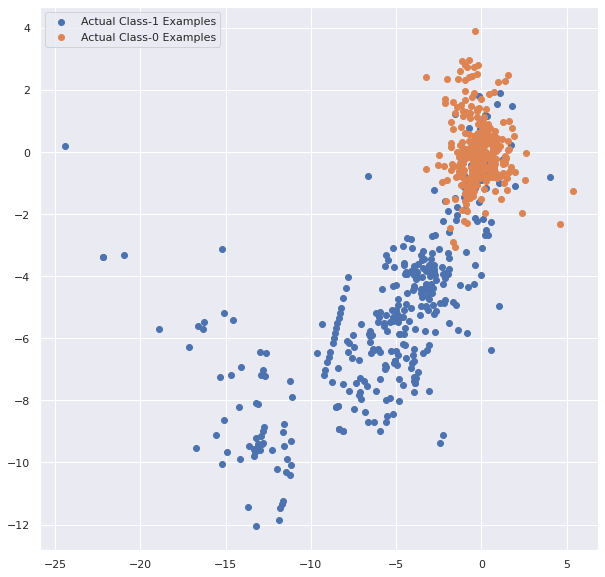

In [64]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

`End of Case Study`